In [209]:
############## Machine Learning: Linear Regression: VEHICLES DATASET #############
################# Step 1: Import all the required Libraries #################
 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [170]:
################## Machine Learning: Linear Regression #####################
################ Step 2: Reading (or Loading) the dataset: #################

data = pd.read_csv('vehicles.csv')
data

DateTime  Vehicles
0      2015-11-01 00:00:00        15
1      2015-11-01 01:00:00        13
2      2015-11-01 02:00:00        10
3      2015-11-01 03:00:00         7
4      2015-11-01 04:00:00         9
...                    ...       ...
48115  2017-06-30 19:00:00        11
48116  2017-06-30 20:00:00        30
48117  2017-06-30 21:00:00        16
48118  2017-06-30 22:00:00        22
48119  2017-06-30 23:00:00        12

[48120 rows x 2 columns]

In [171]:
################## Machine Learning: Linear Regression #####################
################ Step 2: Reading (or Loading) the dataset: #################

data = pd.read_csv('vehicles.csv')
data.head()

DateTime  Vehicles
0  2015-11-01 00:00:00        15
1  2015-11-01 01:00:00        13
2  2015-11-01 02:00:00        10
3  2015-11-01 03:00:00         7
4  2015-11-01 04:00:00         9

In [172]:
############# Machine Learning: Linear Regression #############
################# Step 3: Inspect Data Types: #################
# Inspect data types: To view the data types of each column in the DataFrame, (1) use the .info() method or (2) the .dtypes attribute.

# Load the CSV file into a pandas DataFrame
try:
    data = pd.read_csv('vehicles.csv')

    # Get the shape of the DataFrame
    # The .shape attribute returns a tuple (number_of_rows, number_of_columns)
    data_shape = data.shape

    # Print the shape
    print(f"The shape of vehicles.csv is: {data_shape}")
    print(f"Number of rows: {data_shape[0]}")
    print(f"Number of columns: {data_shape[1]}")
    
    # Using .dtypes for a Series showing only data types
    print(f"\nType of data is: {data.dtypes}")
    
except FileNotFoundError:
    print("Error: 'car.csv' not found. Please ensure the file is in the correct directory.")
except Exception as e:
    print(f"An error occurred: {e}")


The shape of vehicles.csv is: (48120, 2)
Number of rows: 48120
Number of columns: 2

Type of data is: DateTime    object
Vehicles     int64
dtype: object


In [173]:
############# Machine Learning: Linear Regression #############
################# Step 3: Inspect Data Types: #################
# Inspect data types: To view the data types of each column in the DataFrame, (1) use the .info() method or (2) the .dtypes attribute.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Vehicles  48120 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 752.0+ KB


In [174]:
#################### Machine Learning: Linear Regression ####################
################# Step 4: Data pre-processing and cleaning: #################

# pandas.to_numeric: Convert argument to a numeric type.
# pandas.to_numeric(arg, errors='raise', downcast=None, dtype_backend=<no_default>)[source]
##### Parameters: #####

##### argscalar, list, tuple, 1-d array, or Series #####

##### errors{‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’ #####
####### If ‘raise’, then invalid parsing will raise an exception.
####### If ‘coerce’, then invalid parsing will be set as NaN.
####### If ‘ignore’, then invalid parsing will return the input.

##### downcaststr, default None #####
# Can be ‘integer’, ‘signed’, ‘unsigned’, or ‘float’. If not None, and if the data has been successfully cast to a numerical dtype (or if the data was numeric to begin with)
# , downcast that resulting data to the smallest numerical dtype possible according to the following rules:
# ‘integer’ or ‘signed’: smallest signed int dtype (min.: np.int8)
# ‘unsigned’: smallest unsigned int dtype (min.: np.uint8)
# ‘float’: smallest float dtype (min.: np.float32)
# As this behaviour is separate from the core conversion to numeric values, any errors raised during the downcasting will be surfaced regardless of the value of the ‘errors’ input.
# In addition, downcasting will only occur if the size of the resulting data’s dtype is strictly larger than the dtype it is to be cast to, so if none of the dtypes checked satisfy that specification
# , no downcasting will be performed on the data.

##### dtype_backend{‘numpy_nullable’, ‘pyarrow’}, default ‘numpy_nullable’ ##### 
# Back-end data type applied to the resultant DataFrame (still experimental). Behaviour is as follows:
# "numpy_nullable": returns nullable-dtype-backed DataFrame (default).
# "pyarrow": returns pyarrow-backed nullable ArrowDtype DataFrame.

In [175]:
#################### Machine Learning: Linear Regression ####################
################# Step 4: Data pre-processing and cleaning: #################

## The split() method splits a string into a list.
## string.split(separator, maxsplit)

# Parameter Values
# Parameter	Description
# separator	Optional. Specifies the separator to use when splitting the string. By default any whitespace is a separator
# maxsplit	Optional. Specifies how many splits to do. Default value is -1, which is "all occurrences"

In [176]:
#################### Machine Learning: Linear Regression ####################
################# Step 4: Data pre-processing and cleaning: #################

# Approach 1: The code will iterate through all the dates in your list 
# and print the separated year, month, and day for each entry

"""# Assuming 'data' is a dictionary with a key 'DateTime'
# and data['DateTime'] is a list of date strings, e.g.:
# data = {'DateTime': ['2023-10-27', '2024-01-15', '2025-05-30']}

for date_string in data['DateTime']:
    # Split the string by the hyphen '-'
    # and unpack the resulting list directly into three variables
    y, m, d = date_string.split('-')

    # Print the year, month, and day
    print(f"Year: {y}, Month: {m}, Day: {d}")
    # Or simply:
    # print(y, m, d)"""


'# Assuming \'data\' is a dictionary with a key \'DateTime\'\n# and data[\'DateTime\'] is a list of date strings, e.g.:\n# data = {\'DateTime\': [\'2023-10-27\', \'2024-01-15\', \'2025-05-30\']}\n\nfor date_string in data[\'DateTime\']:\n    # Split the string by the hyphen \'-\'\n    # and unpack the resulting list directly into three variables\n    y, m, d = date_string.split(\'-\')\n\n    # Print the year, month, and day\n    print(f"Year: {y}, Month: {m}, Day: {d}")\n    # Or simply:\n    # print(y, m, d)'

In [177]:
#################### Machine Learning: Linear Regression ####################
################# Step 4: Data pre-processing and cleaning: #################

# Approach 2: The code will iterate through all the dates in your list 
# and print the separated year, month, and day for each entry

"""# Example data for demonstration purposes
data = {
    'DateTime': [
        '2023-01-15',
        '2024-05-20',
        '2025-12-31'
    ]
}

for date_str in data['DateTime']:
    # Ensure the input is a string before splitting
    if isinstance(date_str, str):
        try:
            # Split the string by the '-' character
            x = date_str.split('-')
            
            # Unpack the list into year, month, and day variables
            y, m, d = x
            
            # Print the components
            print(f"Year: {y}, Month: {m}, Day: {d}")
            
        except ValueError:
            # Handle cases where the string might not be in the expected format
            print(f"Skipping invalid date format: {date_str}")
    else:
        print(f"Skipping non-string data: {date_str}")"""


'# Example data for demonstration purposes\ndata = {\n    \'DateTime\': [\n        \'2023-01-15\',\n        \'2024-05-20\',\n        \'2025-12-31\'\n    ]\n}\n\nfor date_str in data[\'DateTime\']:\n    # Ensure the input is a string before splitting\n    if isinstance(date_str, str):\n        try:\n            # Split the string by the \'-\' character\n            x = date_str.split(\'-\')\n            \n            # Unpack the list into year, month, and day variables\n            y, m, d = x\n            \n            # Print the components\n            print(f"Year: {y}, Month: {m}, Day: {d}")\n            \n        except ValueError:\n            # Handle cases where the string might not be in the expected format\n            print(f"Skipping invalid date format: {date_str}")\n    else:\n        print(f"Skipping non-string data: {date_str}")'

In [178]:
#################### Machine Learning: Linear Regression ####################
################# Step 4: Data pre-processing and cleaning: #################

# Approach 3: The code will iterate through all the dates in your list 
# and print the separated year, month, and day for each entry

"""# Step 1: Convert the 'DateTime' column to a proper datetime format
# If your DateTime column is already in a standard format (e.g., 'YYYY-MM-DD HH:MM:SS'), 
# you can use errors='coerce' to turn unparseable dates into NaT (Not a Time)
data['DateTime'] = pd.to_datetime(data['DateTime'], errors='coerce')

# Optional: Drop rows where DateTime conversion failed (if any)
data.dropna(subset=['DateTime'], inplace=True)

# Step 2: Extract year, month, day, and hour components into new columns
data['year'] = data['DateTime'].dt.year
data['mo'] = data['DateTime'].dt.month
data['day'] = data['DateTime'].dt.day
data['ho'] = data['DateTime'].dt.hour

# The new columns (year, mo, day, ho) will be created as numeric types (int64 or float64 if NaNs were introduced), 
# so no further pd.to_numeric() calls are strictly necessary for them.

print(data.head())
print(data.info())"""

"# Step 1: Convert the 'DateTime' column to a proper datetime format\n# If your DateTime column is already in a standard format (e.g., 'YYYY-MM-DD HH:MM:SS'), \n# you can use errors='coerce' to turn unparseable dates into NaT (Not a Time)\ndata['DateTime'] = pd.to_datetime(data['DateTime'], errors='coerce')\n\n# Optional: Drop rows where DateTime conversion failed (if any)\ndata.dropna(subset=['DateTime'], inplace=True)\n\n# Step 2: Extract year, month, day, and hour components into new columns\ndata['year'] = data['DateTime'].dt.year\ndata['mo'] = data['DateTime'].dt.month\ndata['day'] = data['DateTime'].dt.day\ndata['ho'] = data['DateTime'].dt.hour\n\n# The new columns (year, mo, day, ho) will be created as numeric types (int64 or float64 if NaNs were introduced), \n# so no further pd.to_numeric() calls are strictly necessary for them.\n\nprint(data.head())\nprint(data.info())"

In [179]:
#################### Machine Learning: Linear Regression ####################
################# Step 4: Data pre-processing and cleaning: #################

# Approach 4: The code will iterate through all the dates in your list 
# and print the separated year, month, and day for each entry

for i in data['DateTime']:
    print(f"Original string: {i}")
    
    x = i.split(' ')
# This line splits the current string i into a list of substrings using the space character (' ') as a delimiter. 
# Assuming the string is in a standard format like "YYYY-MM-DD HH:MM:SS", x will become a list like ['YYYY-MM-DD', 'HH:MM:SS']
    
    t = x[0].split('-')
# This line accesses the first element of the list x (which is the date part: 'YYYY-MM-DD').
# It then splits this date part using the hyphen character ('-') as a delimiter. t becomes a list like ['YYYY', 'MM', 'DD'].    
    
    y, m, d = t
# This line performs unpacking. It takes the three elements from the list t and assigns them to three separate variables:
# y gets the year (e.g., 'YYYY').
# m gets the month (e.g., 'MM').
# d gets the day (e.g., 'DD').

    print(y, m, d) 

Original string: 2015-11-01 00:00:00
2015 11 01
Original string: 2015-11-01 01:00:00
2015 11 01
Original string: 2015-11-01 02:00:00
2015 11 01
Original string: 2015-11-01 03:00:00
2015 11 01
Original string: 2015-11-01 04:00:00
2015 11 01
Original string: 2015-11-01 05:00:00
2015 11 01
Original string: 2015-11-01 06:00:00
2015 11 01
Original string: 2015-11-01 07:00:00
2015 11 01
Original string: 2015-11-01 08:00:00
2015 11 01
Original string: 2015-11-01 09:00:00
2015 11 01
Original string: 2015-11-01 10:00:00
2015 11 01
Original string: 2015-11-01 11:00:00
2015 11 01
Original string: 2015-11-01 12:00:00
2015 11 01
Original string: 2015-11-01 13:00:00
2015 11 01
Original string: 2015-11-01 14:00:00
2015 11 01
Original string: 2015-11-01 15:00:00
2015 11 01
Original string: 2015-11-01 16:00:00
2015 11 01
Original string: 2015-11-01 17:00:00
2015 11 01
Original string: 2015-11-01 18:00:00
2015 11 01
Original string: 2015-11-01 19:00:00
2015 11 01
Original string: 2015-11-01 20:00:00
201

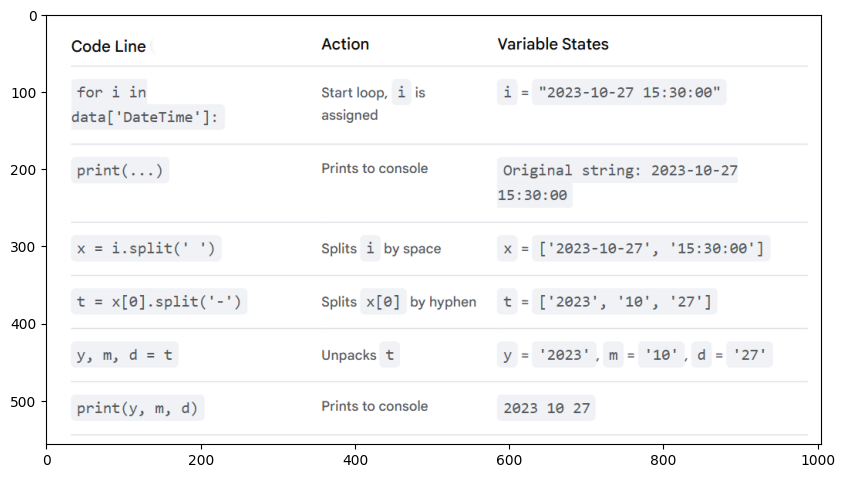

In [1]:
############### Machine Learning: the Perceptron algorithm #################

#### Result of the previous cell: 

import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=[10, 10])
img = cv2.imread('a1.png')

# Convert the image from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

In [181]:
#################### Machine Learning: Linear Regression ####################
################# Step 4: Data pre-processing and cleaning: #################

ye = []
mo = []
day = []
ho = []

for i in data['DateTime']:
    x = i.split(' ')
    t = x[0].split('-')
    y, m, d = t
    h = x[1][:2]

    ye.append(y)
    mo.append(m)
    day.append(d)
    ho.append(h)


In [182]:
#################### Machine Learning: Linear Regression ####################
################# Step 4: Data pre-processing and cleaning: #################

data['year'] = ye
data['mo'] = mo
data['day'] = day
data['ho'] = ho
data

DateTime  Vehicles  year  mo day  ho
0      2015-11-01 00:00:00        15  2015  11  01  00
1      2015-11-01 01:00:00        13  2015  11  01  01
2      2015-11-01 02:00:00        10  2015  11  01  02
3      2015-11-01 03:00:00         7  2015  11  01  03
4      2015-11-01 04:00:00         9  2015  11  01  04
...                    ...       ...   ...  ..  ..  ..
48115  2017-06-30 19:00:00        11  2017  06  30  19
48116  2017-06-30 20:00:00        30  2017  06  30  20
48117  2017-06-30 21:00:00        16  2017  06  30  21
48118  2017-06-30 22:00:00        22  2017  06  30  22
48119  2017-06-30 23:00:00        12  2017  06  30  23

[48120 rows x 6 columns]

In [183]:
#################### Machine Learning: Linear Regression ####################
################# Step 4: Data pre-processing and cleaning: #################

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Vehicles  48120 non-null  int64 
 2   year      48120 non-null  object
 3   mo        48120 non-null  object
 4   day       48120 non-null  object
 5   ho        48120 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.2+ MB


In [184]:
#################### Machine Learning: Linear Regression ####################
################# Step 4: Data pre-processing and cleaning: #################

data['year'] = pd.to_numeric(data['year'], errors = 'coerce')
# The code data['year'] = pd.to_numeric(data['year'], errors = 'coerce') converts the values in the 'year' column of the pandas DataFrame data to a numeric data type. 
# The key part of this operation is the errors = 'coerce' parameter, which handles cases where a value cannot be converted to a number. 

#### Before the code is executed:
# Data Type: The data['year'] column likely has an object (string) or some other non-numeric data type.
# Data Content: The column contains values that look like numbers (e.g., '2020', '1995'), but may also contain non-numeric data or typos (e.g., 'unknown', '2001a', or empty strings).

#### After the code is executed:
# Data Type: The data['year'] column's data type is changed to a numeric type (typically float64, because NaN values, which are floats, may have been introduced).
# Data Content: Values that could be successfully converted to numbers remain as numbers (e.g., '2020' becomes 2020.0 or 2020).

data['mo'] = pd.to_numeric(data['mo'], errors = 'coerce')
data['day'] = pd.to_numeric(data['day'], errors = 'coerce')
data['ho'] = pd.to_numeric(data['ho'], errors = 'coerce')


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Vehicles  48120 non-null  int64 
 2   year      48120 non-null  int64 
 3   mo        48120 non-null  int64 
 4   day       48120 non-null  int64 
 5   ho        48120 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 2.2+ MB


In [185]:
#################### Machine Learning: Linear Regression ####################
################# Step 4: Data pre-processing and cleaning: #################

data

DateTime  Vehicles  year  mo  day  ho
0      2015-11-01 00:00:00        15  2015  11    1   0
1      2015-11-01 01:00:00        13  2015  11    1   1
2      2015-11-01 02:00:00        10  2015  11    1   2
3      2015-11-01 03:00:00         7  2015  11    1   3
4      2015-11-01 04:00:00         9  2015  11    1   4
...                    ...       ...   ...  ..  ...  ..
48115  2017-06-30 19:00:00        11  2017   6   30  19
48116  2017-06-30 20:00:00        30  2017   6   30  20
48117  2017-06-30 21:00:00        16  2017   6   30  21
48118  2017-06-30 22:00:00        22  2017   6   30  22
48119  2017-06-30 23:00:00        12  2017   6   30  23

[48120 rows x 6 columns]

In [186]:
#################### Machine Learning: Linear Regression ####################
################# Step 4: Data pre-processing and cleaning: #################

data.drop(columns = ['DateTime'], inplace = True)
# This line is used to remove the column named 'DateTime' from a pandas DataFrame named data. 

In [187]:
#################### Machine Learning: Linear Regression ####################
################# Step 4: Data pre-processing and cleaning: #################

data.duplicated().sum() # is used with the pandas library to count the number of duplicate *rows* in a DataFrame called data


np.int64(1082)

In [188]:
#################### Machine Learning: Linear Regression ####################
################# Step 4: Data pre-processing and cleaning: #################

data.drop_duplicates(inplace = True) 
# it modifies the original DataFrame data directly to remove duplicate *rows* and does not return a new DataFrame. 

In [189]:
#################### Machine Learning: Linear Regression ####################
################# Step 4: Data pre-processing and cleaning: #################

data.isna().sum()
# The result of this command is a Series that shows the total number of missing values present in each column of your DataFrame. 
# This helps you quickly identify which columns have data quality issues that might need cleaning or handling. 

Vehicles    0
year        0
mo          0
day         0
ho          0
dtype: int64

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47038 entries, 0 to 48119
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Vehicles  47038 non-null  int64
 1   year      47038 non-null  int64
 2   mo        47038 non-null  int64
 3   day       47038 non-null  int64
 4   ho        47038 non-null  int64
dtypes: int64(5)
memory usage: 2.2 MB


In [191]:
################### Machine Learning: Linear Regression ####################
# Step 5: how to separate features (independent variables) and the target variable (dependent variable) within a pandas DataFrame #                            

y = data['Vehicles']
x = data.drop(columns = ['Vehicles'])
# x = data.drop(columns = ['Vehicles']): Create a new DataFrame 'x' without the 'Vehicles' column
# In other words, the resulting DataFrame x will contain all the original rows and columns from data except for the 'Vehicles' column.


In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47038 entries, 0 to 48119
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Vehicles  47038 non-null  int64
 1   year      47038 non-null  int64
 2   mo        47038 non-null  int64
 3   day       47038 non-null  int64
 4   ho        47038 non-null  int64
dtypes: int64(5)
memory usage: 2.2 MB


In [203]:
data['year']

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
48115    2017
48116    2017
48117    2017
48118    2017
48119    2017
Name: year, Length: 47038, dtype: int64

In [192]:
############################ Machine Learning: Linear Regression ###############################
################ Step 6: Create and Split data into training and testing sets: #################                           

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)
print(f"x_train.shape is {x_train.shape} \ny_train.shape is {y_train.shape} \nx_test.shape is {x_test.shape} \ny_test.shape is {y_test.shape}")

x_train.shape is (31515, 4) 
y_train.shape is (31515,) 
x_test.shape is (15523, 4) 
y_test.shape is (15523,)


In [195]:
########################### Machine Learning: Linear Regression #############################
##################### Step 7: Create and train a LinearRegression model: ####################
RegModel = LinearRegression()
RegModel.fit(x_train, y_train)

LinearRegression()

In [197]:
################### Machine Learning: Linear Regression ##################
##################### Step 8: Exploring our results: #####################

y_pre = RegModel.predict(x_test)

y_pre


array([33.39795944, 26.87571222, 29.501628  , ..., 23.68626246,
       25.30986455, 14.08850486], shape=(15523,))

In [198]:
################### Machine Learning: Linear Regression ##################
##################### Step 8: Exploring our results: #####################

RegModel.coef_

array([11.56345455,  1.08689511,  0.06870458,  0.65570834])

In [199]:
################### Machine Learning: Linear Regression ##################
##################### Step 8: Exploring our results: #####################

RegModel.intercept_

np.float64(-23307.027293487376)

Model fitted with slope: 11.56
Model fitted with intercept: -23307.03


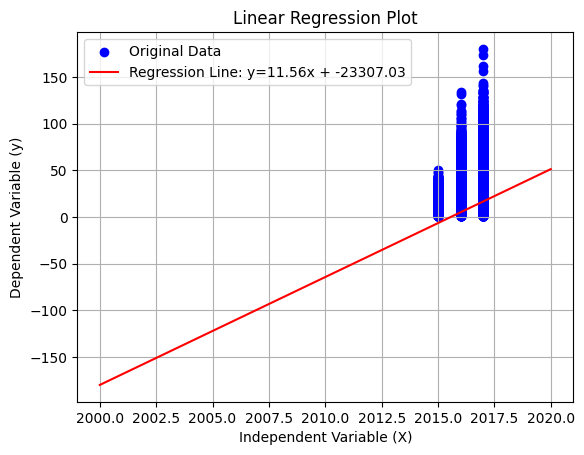

In [206]:
################### Machine Learning: Linear Regression ##################
##################### Step 8: Exploring our results: #####################

x = data['year']
y = data['Vehicles']

# Get the coefficient (slope) and intercept
slope = RegModel.coef_[0]
intercept = RegModel.intercept_

print(f"Model fitted with slope: {slope:.2f}")
print(f"Model fitted with intercept: {intercept:.2f}")

# 3. Plot the original data
plt.scatter(x, y, color='b', label='Original Data')

# 4. Plot the regression line
# The line equation is y = slope * x + intercept
# To plot the line, create a range of x-values and compute the corresponding y-values
x_line = np.linspace(2000, 2020 , 500)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, color='r', label=f'Regression Line: y={slope:.2f}x + {intercept:.2f}')

# Add labels, title, and legend for clarity
plt.title('Linear Regression Plot')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.legend()
plt.grid(True)
plt.show()


In [207]:
################### Machine Learning: Linear Regression ###################
##################### Step 9: Evaluating our results: #####################

mse = mean_squared_error(y_test, y_pre)
mse


374.5806802446787

In [208]:
################### Machine Learning: Linear Regression ###################
##################### Step 9: Evaluating our results: #####################

r = r2_score(y_test, y_pre)
r

0.12296704515427992